In [224]:
from glob import glob
import ek80Spectra

files = sorted(glob('C:/Users/rober/Downloads/Atlantis*6.raw')) # grab the split (FM only) raw files
rawFiles = files[0:2];print(rawFiles) # Let's grab only 2 as an example

calFilesXML=glob('C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml/*.xml');print(calFilesXML) # Here are the calibration filesfrom EK80

['C:/Users/rober/Downloads\\Atlantis_-D20220217-T173056.raw']
['C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml\\120000CalibrationDataFile-D20220119-T162218.xml', 'C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml\\18000CalibrationDataFile-D20220119-T181450.xml', 'C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml\\200000CalibrationDataFile-D20220118-T194518.xml', 'C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml\\38000CalibrationDataFile-D20220118-T200301.xml', 'C:/Users/rober/Documents/projects/rltools/ek80Tools/MATLABProcessing/sato/input/cal_xml\\70000CalibrationDataFile-D20220119-T160205.xml']


In [225]:
# Read it all in. The first two values are the window x-dimension (40 pings) and window z-dimension (5 meters). Using 0 for the x just uses the width of each file.
# 's' is just an ek80Spectra object that contains the echolab object and some. I've got some hardcoded cutoffs, such that the bins start at 3 m to remove the transmit.
s = ek80Spectra.ek80Spectra(20, 5,rawFiles, calFilesXML)

Reading raw files...
Found  5 frequencies: [18000.0, 38000.0, 70000.0, 120000.0, 200000.0]


In [226]:
s.freqs

[18000.0, 38000.0, 70000.0, 120000.0, 200000.0]

In [227]:
# Calculate the spectra
# Currently since echolab is having difficutly with ECS files and only stores the gain for the nominal frequency, 
# it will only calculate spectra for frequencies with an EK80 cal file
s.calcSpectra()

Skipping  18000.0 , only CW data found.
Calculating spectra for  38000.0
Grabbing cal data from  .xml file
Calculating spectra for 26 vertical windows in 8  horizontal windows
Calculating spectra for  70000.0
Grabbing cal data from  .xml file
Calculating spectra for 26 vertical windows in 8  horizontal windows
Calculating spectra for  120000.0
Grabbing cal data from  .xml file
Calculating spectra for 26 vertical windows in 8  horizontal windows
Calculating spectra for  200000.0
Grabbing cal data from  .xml file
Calculating spectra for 26 vertical windows in 8  horizontal windows


In [5]:
# The output is saved in a dictionary, where the first level is by frequency and the second is the data
display(s.spectraDict.keys())
display(s.spectraDict[38000].keys())

dict_keys([38000.0, 70000.0, 120000.0, 200000.0])

dict_keys(['rangeBinCenters', 'rangeBinSize', 'windowSampleIndex', 'windowPingStart', 'windowPingStartTime', 'Sv', 'frequency'])

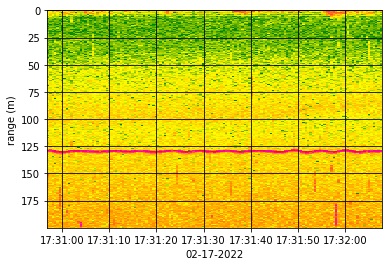

In [7]:
# Since the echolab data is in there let's plot up Sv
from matplotlib.pyplot import figure, show, subplots_adjust, get_cmap
from echolab2.plotting.matplotlib import echogram
d_sv =s.data.get_Sv()
fig_1 = figure()
eg = echogram.Echogram(fig_1, d_sv)

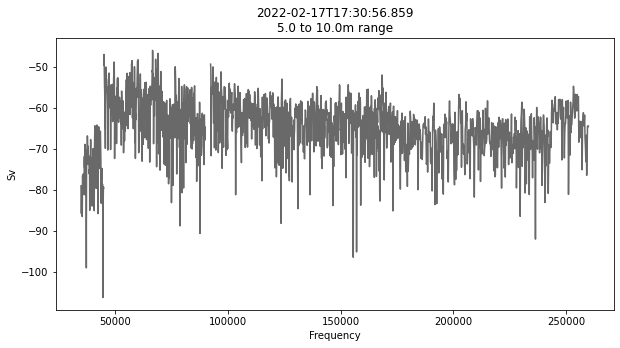

In [229]:
s.plotSpec(0,1)